In [38]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [39]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data

#### Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

In [53]:
Tesla = yf.Ticker('TSLA')

#### Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.

In [54]:
tesla_data = Tesla.history(period = "max")

In [55]:
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [64]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
response = requests.get(url, headers=headers)

In [66]:
soup = BeautifulSoup(response.text, "html.parser")

print(soup.find_all('title'))

[<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>]


In [78]:
tesla_revenue = []
for table in soup.find_all('table'):
    header = table.find('th')
    if header and 'Tesla Quarterly Revenue' in header.text:
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            if len(cols) >= 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace('$', '').replace(',', '')
                if revenue != '':
                    tesla_revenue.append({"Date": date, "Revenue": revenue})

tesla_revenue_df = pd.DataFrame(tesla_revenue)

In [82]:
tesla_revenue_df = pd.DataFrame(tesla_revenue)
print(tesla_revenue_df.tail())

          Date Revenue
57  2010-09-30      31
58  2010-06-30      28
59  2010-03-31      21
60  2009-09-30      46
61  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data

In [83]:
GameStop = yf.Ticker("GME")

In [84]:
gme_data = GameStop.history(period = 'max')

In [85]:
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674835,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In [125]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [126]:
soup = BeautifulSoup(html_data,"html5lib")

In [127]:
tables = pd.read_html(url, match="GameStop Quarterly Revenue", flavor='bs4')
gme_revenue = tables[0]

In [128]:
gme_revenue = gme_revenue.rename(columns={'GameStop Quarterly Revenue (Millions of US $)': 'Date','GameStop Quarterly Revenue (Millions of US $).1': 'Revenue'})

In [129]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
gme_revenue.dropna(inplace=True)

In [130]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5 - Tesla Stock and Revenue Dashboard

In [134]:
print(type(tesla_revenue))

<class 'list'>


In [138]:
tesla_revenue = pd.DataFrame(tesla_revenue, columns=['Date', 'Revenue'])

In [139]:
# Clean up revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue.dropna(inplace=True)


C:\Users\Istiak\AppData\Local\Temp\ipykernel_12156\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Istiak\AppData\Local\Temp\ipykernel_12156\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



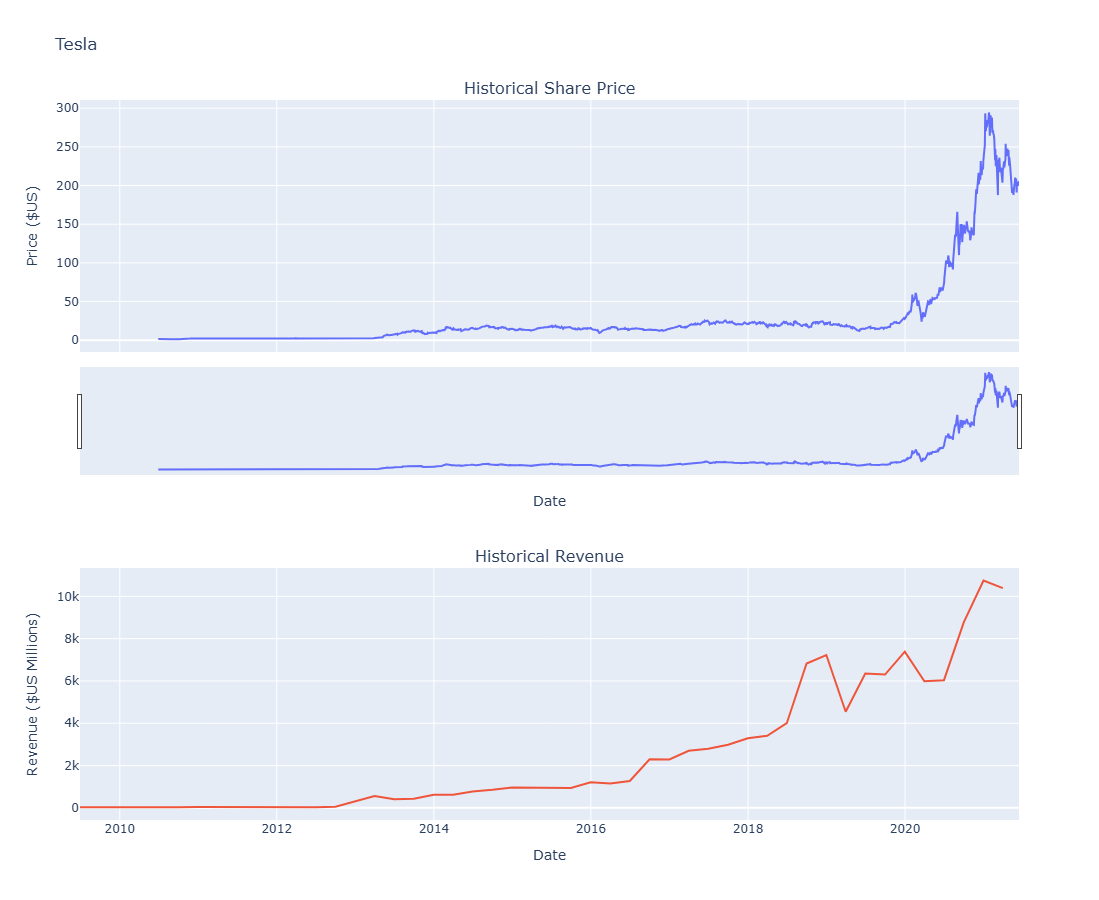

In [140]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6 - GameStop Stock and Revenue Dashboard

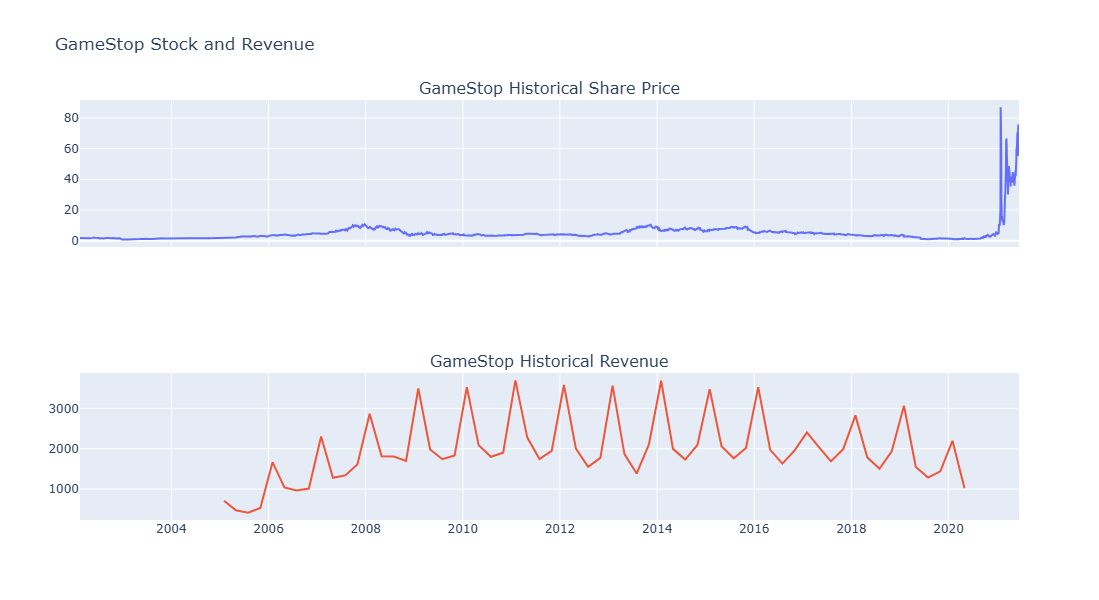

In [144]:
make_graph(gme_data, gme_revenue, 'GameStop')